In [1]:
import mygene
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Download infos

In [2]:
mg = mygene.MyGeneInfo()

In [9]:
mg.getgenes(['ENSG00000242268'],'name,symbol,refseq.rna,type_of_gene')

querying 1-1...done.


[{u'_id': u'100507661',
  u'_score': 19.559643,
  u'name': u'long intergenic non-protein coding RNA 2082',
  u'query': u'ENSG00000242268',
  u'refseq': {u'rna': u'NR_109989.1'},
  u'symbol': u'LINC02082',
  u'type_of_gene': u'ncRNA'}]

In [5]:
df = pd.read_csv("genes.txt", header=[0], index_col=[0])
df.head()

,type_of_gene
ENSG00000242268,ncRNA
ENSG00000270112,unknown
ENSG00000167578,protein-coding
ENSG00000273842,unknown
ENSG00000078237,protein-coding


In [6]:
types = df['type_of_gene'].values

## count types

In [7]:
utype, count = np.unique(np.array(types), return_counts=True)

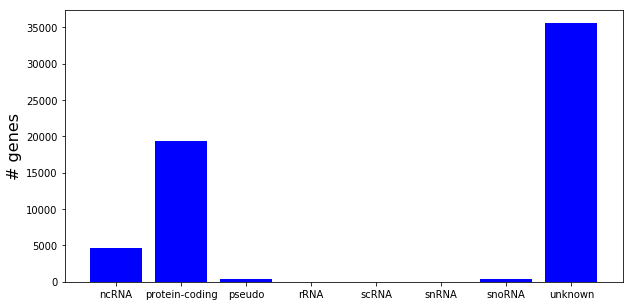

In [8]:
fig = plt.figure(figsize=(10,5))
plt.bar(utype, count, color='blue')
plt.ylabel("# genes", fontsize=16)
plt.show()
fig.savefig("genes_distr.pdf")

In [9]:
np.sum(count[1:7])

20198

In [11]:
protein_codings = df.loc[df['type_of_gene']=='protein-coding'].index.values

In [ ]:
#df_pc = pd.DataFrame(data=protein_codings)
#df_pc.head()
#df_pc.to_csv("genes_pc.txt", header=None, index=None)

In [12]:
protein_codings

array(['ENSG00000167578', 'ENSG00000078237', 'ENSG00000146083', ...,
       'ENSG00000105063', 'ENSG00000123685', 'ENSG00000181518'],
      dtype=object)

# Load infos

In [3]:
df_main = pd.read_csv("mainTable.csv")
genes = np.array([gene[:15] for gene in df_main.loc[:,'gene'].values])
df_main['gene'] = genes
df_main.head()

,gene,821e42cc-d1b9-48e1-959d-9df561c4aeb5.F,5d7766c6-e42f-4f85-9065-d8bcc54d7db9.F,f1f609a2-4fd6-48fc-8a29-3bc39c6ff178.F,29d09b58-3cc2-47c0-b78e-18743eed2c2f.F,f9153720-86f1-4d70-b2a9-7b88dd365514.F,597e0bf5-b228-432f-b469-9498bb812f98.F,f79772b6-251a-447c-a1dc-e77521d98c15.F,20e20086-f76a-48f1-a1a8-c2de77a092b0.F,0ca8f6dd-6ffc-416c-8f06-5dee152618a9.F,...,21e82bf2-237f-4f8f-86d0-aaf2ea5c4729.F,7f5a924a-ddf3-45ff-be1f-5b5909305f46.F,d5c8759b-0dc1-4057-b9df-c9aa4a6b2a04.F,d3f73c0f-d518-4e91-b038-a4360495ee27.F,4869e2a4-f182-41f1-8aed-52b5dd3b5c00.F,d8b37f77-500a-4c1e-b344-41f4e0c6fea6.F,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7.F,1a587b92-0a11-47f0-83c2-77a2b6de1088.F,9c77be54-d58e-4dec-8894-acb71a12cac5.F,2556ce90-db5f-4beb-897a-db3cf556e054.F
0,ENSG00000242268,0.000000,0.000000,1.427633,0.000000,0.061914,0.026550,0.055186,1.346753,0.000000,...,0.023556,0.000000,0.000000,0.286641,0.513100,0.000000,0.027827,0.000000,0.000000,0.000000
1,ENSG00000270112,0.000000,0.006083,0.177454,0.000000,0.008591,0.011052,0.033181,0.000000,0.000000,...,0.000000,0.010471,0.010444,0.015909,0.000000,0.009306,0.003861,0.031637,0.000000,0.016449
2,ENSG00000167578,4.335807,4.711715,5.851848,3.270882,3.651170,4.740114,2.531203,3.267413,1.359582,...,3.538693,2.163905,3.348341,2.222798,5.219926,5.666720,2.509192,1.182190,3.463509,3.816159
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,6.277226,1.997385,7.446510,2.287782,3.679019,1.696093,2.121344,6.365669,4.144660,...,5.455092,4.750105,5.774992,2.558247,2.870966,4.079897,2.699238,6.278986,6.234426,5.366732


### method 1

In [ ]:
gdf = pd.read_csv("genes.csv")
gdf.head()

In [ ]:
df_main.insert(1,'type_of_gene', '')
for g in df_main['gene'].values:
    df_main.at[g, 'type_of_gene'] = gdf.loc[g[:15]]['type_of_gene']

In [ ]:
df_main_pc = df_main.loc[df_main['type_of_gene']=='protein-coding']
df_main_pc.to_csv("mainTable_pc.csv", index = False)

### method 2

In [33]:
df_main_pc = pd.DataFrame(columns=df_main.columns)
df_main_pc.to_csv("mainTable_pc.csv", index = False)

In [34]:
for i, gene in enumerate(protein_codings):
    df_main.loc[df_main['gene']==gene].to_csv("mainTable_pc.csv", mode='a', header=None, index=False)
    if(i%100==0):
        print("elapsed %d"%i)

elapsed 0
elapsed 100
elapsed 200
elapsed 300
elapsed 400
elapsed 500
elapsed 600
elapsed 700
elapsed 800
elapsed 900
elapsed 1000
elapsed 1100
elapsed 1200
elapsed 1300
elapsed 1400
elapsed 1500
elapsed 1600
elapsed 1700
elapsed 1800
elapsed 1900
elapsed 2000
elapsed 2100
elapsed 2200
elapsed 2300
elapsed 2400
elapsed 2500
elapsed 2600
elapsed 2700
elapsed 2800
elapsed 2900
elapsed 3000
elapsed 3100
elapsed 3200
elapsed 3300
elapsed 3400
elapsed 3500
elapsed 3600
elapsed 3700
elapsed 3800
elapsed 3900
elapsed 4000
elapsed 4100
elapsed 4200
elapsed 4300
elapsed 4400
elapsed 4500
elapsed 4600
elapsed 4700
elapsed 4800
elapsed 4900
elapsed 5000
elapsed 5100
elapsed 5200
elapsed 5300
elapsed 5400
elapsed 5500
elapsed 5600
elapsed 5700
elapsed 5800
elapsed 5900
elapsed 6000
elapsed 6100
elapsed 6200
elapsed 6300
elapsed 6400
elapsed 6500
elapsed 6600
elapsed 6700
elapsed 6800
elapsed 6900
elapsed 7000
elapsed 7100
elapsed 7200
elapsed 7300
elapsed 7400
elapsed 7500
elapsed 7600
elapsed 770